In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import numpy as np
import torch

dtype = torch.float
# device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU

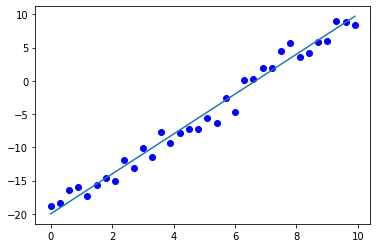

In [6]:
np.random.seed(666)

x = np.arange(0, 10, 0.3)
y = 3 * x - 20
errors = np.random.normal(0, 1.5, y.shape[0])

y_real = y + errors

plt.plot(x, y_real, 'bo')
plt.plot(x, y)

In [8]:
a = torch.randn(1, device=device, dtype=dtype, requires_grad=True)
b = torch.randn(1, device=device, dtype=dtype, requires_grad=True)

learning_rate = 0.0003

for i in range(2000):    
    x_torch = torch.tensor(x).to(device)
    y_real_torch = torch.tensor(y_real).to(device)
    loss = ((a * x_torch + b - y_real_torch) ** 2).sum()
        
    loss.backward()
    
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad

        a.grad.zero_()
        b.grad.zero_()
        
        if i % 100 == 0:
            print('error = {}, {} * x + {}'.format(loss.item(), a.item(), b.item()))      

error = 3517.9736824428414, 0.4462156891822815 * x + -1.7411689758300781
error = 1081.8010316064465, 1.3426274061203003 * x + -9.119088172912598
error = 414.9115816530838, 1.997938632965088 * x + -13.475854873657227
error = 180.37140352785315, 2.3865623474121094 * x + -16.05957794189453
error = 97.88504172221383, 2.6170318126678467 * x + -17.591829299926758
error = 68.87546179332, 2.7537076473236084 * x + -18.500503540039062
error = 58.67304702812176, 2.834761142730713 * x + -19.039379119873047
error = 55.0848166634465, 2.882830858230591 * x + -19.358964920043945
error = 53.822960276291106, 2.9113364219665527 * x + -19.548480987548828
error = 53.3791888147776, 2.9282402992248535 * x + -19.660865783691406
error = 53.223097987645865, 2.9382665157318115 * x + -19.727523803710938
error = 53.16821416937677, 2.94421124458313 * x + -19.767045974731445
error = 53.14891246690655, 2.9477365016937256 * x + -19.790483474731445
error = 53.14212288299741, 2.949827194213867 * x + -19.804384231567383
